In [2]:
import requests
import numpy as np
from PIL import Image

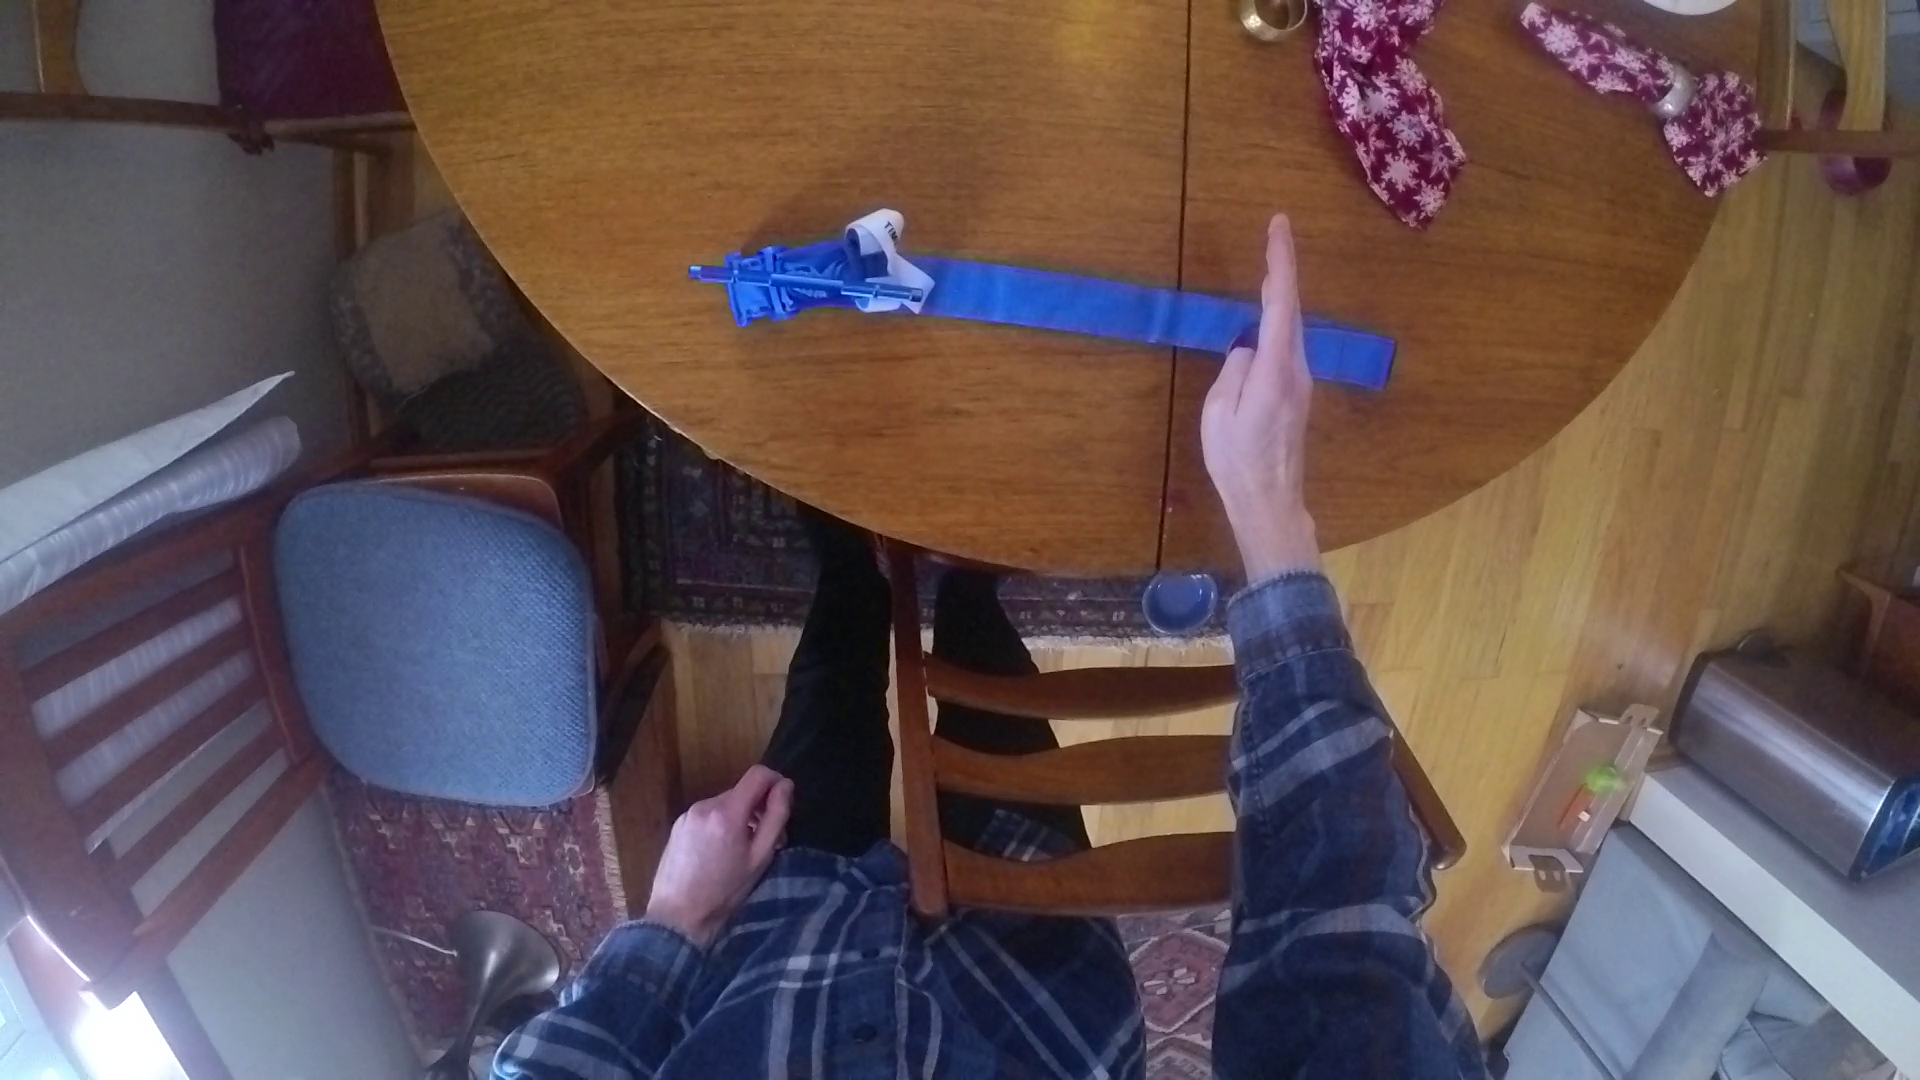

In [3]:
fname = '/home/bea/ptg/bbn_test.png'
im = Image.open(fname)
im_bytes = open(fname, 'rb').read()
im

In [15]:
import librosa
y, sr = librosa.load('/home/bea/ptg/bath_sink.wav')
y.shape, sr

((416256,), 22050)

In [6]:
r = requests.post('http://127.0.0.1:8000/bbn_yolo', data=im_bytes)
print(r.json())

{'xyxyn': [[0.3586141765117645, 0.1921255737543106, 0.7291945815086365, 0.3608950674533844], [0.3362214267253876, 0.7073323726654053, 0.4134455919265747, 0.8632510900497437], [0.43915635347366333, 0.19166836142539978, 0.48629075288772583, 0.2888915240764618], [0.6225627660751343, 0.19596274197101593, 0.6874778866767883, 0.5209016799926758], [0.35844001173973083, 0.24343524873256683, 0.47851553559303284, 0.278891921043396]], 'class_ids': [0.0, 4.0, 1.0, 4.0, 2.0], 'labels': ['tourniquet_tourniquet', 'hands', 'tourniquet_label', 'hands', 'tourniquet_windlass'], 'confidence': [0.9513726234436035, 0.9380268454551697, 0.9070420861244202, 0.8976109623908997, 0.7853727340698242]}


In [14]:
r = requests.post('http://127.0.0.1:8000/omnivore', files=[
    ['video', im_bytes],
    ['video', im_bytes],
    ['video', im_bytes],
])
print(r.text)

[[{"take":0.1860242486000061,"put":0.2100493609905243,"wash":0.04736741632223129,"open":0.01887073740363121,"close":0.028863471001386642,"insert":0.029210368171334267,"turn-on":0.025233153253793716,"cut":0.009553063660860062,"turn-off":0.024399369955062866,"pour":0.015792177990078926,"mix":0.01122300885617733,"move":0.13834257423877716,"remove":0.019726481288671494,"throw":0.01135205663740635,"dry":0.005292495712637901,"shake":0.01096914242953062,"scoop":0.004849907010793686,"adjust":0.014055361971259117,"squeeze":0.0045056333765387535,"peel":0.003006238956004381,"empty":0.005104993004351854,"press":0.008942016400396824,"flip":0.00623250100761652,"turn":0.007877272553741932,"check":0.009667306207120419,"scrape":0.005846781190484762,"fill":0.0036690435372292995,"apply":0.0024036269169300795,"fold":0.0019862602930516005,"scrub":0.0013952588196843863,"break":0.002215874381363392,"pull":0.004027761053293943,"pat":0.004178131930530071,"lift":0.0042775352485477924,"hold":0.010484677739441395

In [16]:
r = requests.post(f'http://127.0.0.1:8000/audio_slowfast?sr={sr}', files=[
    ['audio', y.tobytes()],
])
print(r.text)

Task Error. Traceback: ray::ServeReplica:Server.handle_request() (pid=1749957, ip=10.18.171.175)
  File "/home/bea/miniconda3/envs/ptg/lib/python3.10/site-packages/ray/serve/_private/utils.py", line 238, in wrap_to_ray_error
    raise exception
  File "/home/bea/miniconda3/envs/ptg/lib/python3.10/site-packages/ray/serve/_private/replica.py", line 453, in invoke_single
    result = await method_to_call(*args, **kwargs)
  File "/home/bea/miniconda3/envs/ptg/lib/python3.10/site-packages/ray/serve/api.py", line 222, in __call__
    await self._serve_app(
  File "/home/bea/miniconda3/envs/ptg/lib/python3.10/site-packages/fastapi/applications.py", line 276, in __call__
    await super().__call__(scope, receive, send)
  File "/home/bea/miniconda3/envs/ptg/lib/python3.10/site-packages/starlette/applications.py", line 122, in __call__
    await self.middleware_stack(scope, receive, send)
  File "/home/bea/miniconda3/envs/ptg/lib/python3.10/site-packages/starlette/middleware/errors.py", line 184

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import ptgprocess.yolo
from ptgprocess.yolo import BBNYolo

In [3]:
ls /home/bea/ptg/data/models

cache/             fewshot/               reasoning/
egohos/            __MACOSX/              SLOWFAST_EPIC.pyth
egohos.zip         model_best.pt*         torch_iopath_cache/
epic_mir_plus.pth  omnimix_rgb_audio.pt*  yolo_bbn.pt
epic_mir_plus.zip  pretrained/


In [4]:
m=BBNYolo('/home/bea/ptg/data/models/yolo_bbn.pt')
m

In [14]:
m.unpack_results(m(np.array(im)[:,:,::-1]))


0: 384x640 1 tourniquet_tourniquet, 1 tourniquet_label, 1 tourniquet_windlass, 2 handss, 10.3ms
Speed: 0.3ms preprocess, 10.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


(array([[    0.35862,     0.19214,      0.7292,     0.36088],
        [    0.33622,     0.70733,     0.41345,     0.86325],
        [    0.43915,     0.19167,     0.48629,     0.28889],
        [    0.62256,     0.19596,     0.68748,     0.52091],
        [    0.35844,     0.24344,     0.47852,     0.27888]], dtype=float32),
 None,
 array([          0,           4,           1,           4,           2], dtype=float32),
 array(['tourniquet_tourniquet', 'hands', 'tourniquet_label', 'hands', 'tourniquet_windlass'], dtype='<U21'),
 array([    0.95136,     0.93805,       0.907,     0.89771,     0.78526], dtype=float32),
 None)

In [19]:
from ptgprocess import egohos

ModuleNotFoundError: No module named 'mmseg'